<a href="https://colab.research.google.com/github/Elian19-01/HE/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Algorithm Analysis

#las funciones solo sirven con mis direciones

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sys
import random
from collections import defaultdict


def get_graph(source):

    with open(source) as file_name:
        graf = np.loadtxt(file_name, delimiter = ',')
        graf = graf.astype(int)
    file_name.close()
    return graf

def show_graph(graph, coolor):

    G = nx.from_numpy_matrix(graph)

    pos = nx.spring_layout(G, seed= random.randint(1,20))

    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='w', edgecolors=coolor)
    nx.draw_networkx_edges(G, pos, width=2)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color=coolor)

    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

    plt.show()

In [8]:
graph_1 = get_graph("grafo1.csv")
print(graph_1)

[[ 0  4  0  0  0  0  0  8  0]
 [ 4  0  8  0  0  0  0 11  0]
 [ 0  8  0  7  0  4  0  0  2]
 [ 0  0  7  0  9 14  0  0  0]
 [ 0  0  0  9  0 10  0  0  0]
 [ 0  0  4 14 10  0  2  0  0]
 [ 0  0  0  0  0  2  0  1  6]
 [ 8 11  0  0  0  0  1  0  7]
 [ 0  0  2  0  0  0  6  7  0]]


In [9]:
graph_2 = get_graph("grafo2.csv")
print(graph_2)

[[ 0  2  0  0  0  0  0  7  0]
 [ 3  0  7  0  0  0  0  9  0]
 [ 0  6  0  8  0  5  0  0  3]
 [ 0  0  6  0  7 10  0  0  0]
 [ 0  0  0  8  0 12  0  0  0]
 [ 0  0  3 11  9  0  3  0  0]
 [ 0  0  0  0  0  1  0  2  7]
 [ 6 10  0  0  0  0  2  0  8]
 [ 0  0  1  0  0  0  5  9  0]]


In [10]:
graph_3 = get_graph("grafo3.csv")
print(graph_3)

[[ 0  1  0  0  0  0  0  3  0]
 [ 2  0  5  0  0  0  0  8  0]
 [ 0  6  0  6  0  5  0  0  1]
 [ 0  0  9  0  7 11  0  0  0]
 [ 0  0  0  7  0  9  0  0  0]
 [ 0  0  5 11 12  0  3  0  0]
 [ 0  0  0  0  0  3  0  3  5]
 [ 6  9  0  0  0  0  2  0  6]
 [ 0  0  1  0  0  0  5  8  0]]


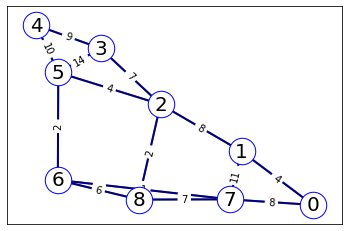

In [11]:
show_graph(graph_1,'b')

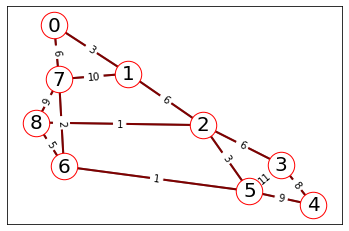

In [12]:
show_graph(graph_2,'r')

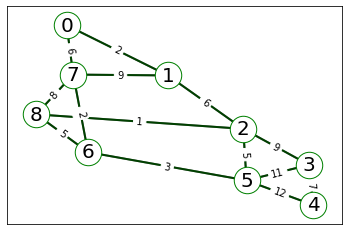

In [13]:
show_graph(graph_3,'g')

# Dijkstra Algorithm

Given a graph and a source vertex in the graph, find the shortest paths from the source to all vertices in the given graph. 9 vertices graph do not forget to start from 0 and finish at 8 this would be 9 vertices

Please measure the time to process for each algorithm and iterations.
Graph them and check performance. 

Create a matrix with all vertices and their distances to feed the algorithm.
9 x 9 matrix like this one.
+ 0	3	0	0	0	0	0	6	0
+ 3	0	7	0	0	0	0	9	0
+ 0	6	0	8	0	3	0	0	1
+ 0	0	5	0	8	11	0	0	0
+ 0	0	0	7	0	9	0	0	0
+ 0	0	3	11	7	0	1	0	0
+ 0	0	0	0	0	3	0	2	7
+ 6	9	0	0	0	0	2	0	6
+ 0	0	1	0	0	0	5	8	0

3 different matrices will be given to you in a csv format. They are called grafo1.csv, grafo2.csv and grafo3.csv.
Load them into a 2D array and use it as an input.
Please make a graphic showing the graph´s vertices and edges with the respective weights or distances. Use any graphic software you may like.
I will attach one as an example.
Remember to start from the vertex 0.



The Output should look at least like this: 

+ Vertex   Distance from Source
+ 0           1
+ 1           3
+ 2           5
+ 3           0
+ 4           8
+ 5           10
+ 6           5
+ 7           13
+ 8           6




In [14]:
# Write your code to calculate the shortest path
class Dijkstra():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
 
    def minDistance(self, dist, sptSet):

        min = sys.maxsize

        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
 
        return min_index
 
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            x = self.minDistance(dist, sptSet)
 
            sptSet[x] = True

            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                dist[y] > dist[x] + self.graph[x][y]:
                        dist[y] = dist[x] + self.graph[x][y]
 
        self.printSolution(dist)

In [15]:
g1 = Dijkstra(9)
g1.graph = graph_1
%time g1.dijkstra(0);

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14
CPU times: user 6.68 ms, sys: 3.22 ms, total: 9.89 ms
Wall time: 13.1 ms


In [16]:
g2 = Dijkstra(9)
g2.graph = graph_2
%time g2.dijkstra(0);

Vertex 	Distance from Source
0 	 0
1 	 2
2 	 9
3 	 17
4 	 19
5 	 10
6 	 9
7 	 7
8 	 12
CPU times: user 1.24 ms, sys: 35 µs, total: 1.28 ms
Wall time: 915 µs


In [17]:
g3 = Dijkstra(9)
g3.graph = graph_3
%time g3.dijkstra(0);

Vertex 	Distance from Source
0 	 0
1 	 1
2 	 6
3 	 12
4 	 19
5 	 8
6 	 5
7 	 3
8 	 7
CPU times: user 1.57 ms, sys: 95 µs, total: 1.66 ms
Wall time: 1.14 ms


# MST Prims Algorithm
Based on the file prims_grafo_9_csv.csv create the MST using Prims Algorithm and draw the graph using any sofwware you may like.
Upload the file into a matrix and feed it to the algorith to calculate the MST.
The data in the CSV file has a 9 x 9 matrix describing a graph.

* MST Properties
    - Graph is undirected

    - MST is a TREE
        + A tree is connected acyclic graph: it has no cycles (ie no closed paths)
        + Number of edges in a tree: |V| - 1

    - MST is a SPANNING Tree
        + Nodes of MST = Nodes of G
        + MST contains a path between any two nodes

    - MST is a MINIMUM Spanning Tree
        + Sum of edges is a minimum

    - MST may not be unique

Print the output like this. Showing the vertices and the weight between them
- Edge    Weight
- 0 - 1    8
- 5 - 2    3
- 1 - 3    5
- 5 - 4    7
- 7 - 5    1
- 3 - 6    4
- 3 - 7    5
- 6 - 8    3

Do the same for the matrix Prims_grafo_matrix_csv.csv. This is an 8 x 8 graph. Draw the graph with any software of your choice.
Make sure to print the matrix you´ve uploaded to verify.

Print the output like this. Showing the vertices and the weight between them
- Edge    Weight
+ 3 - 1    2
+ 5 - 2    4
+ 0 - 3    10
+ 3 - 4    4
+ 3 - 5    2
+ 4 - 6    5
+ 6 - 7    8

In [18]:
# Write Prims Algorthim code to find the MST
class MST():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]

    def printMST(self, parent):
        print ("Edge \tWeight")
        for i in range(1, self.V):
            print (parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def minKey(self, key, mstSet):

        min = sys.maxsize
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    def primMST(self):
 
        key = [sys.maxsize] * self.V
        parent = [None] * self.V
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1
 
        for cout in range(self.V):
 
            u = self.minKey(key, mstSet)
 
            mstSet[u] = True
 
            for v in range(self.V):
 
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u
 
        self.printMST(parent)

# Prims Algorithm with Binary Heap
Use the matrices in CSV format and sort them with Prims Algorithm and using Binary Heap and check the results. 
+ Prims_grafo_matrix_csv.csv
+ prims_grafo_9_csv.csv
+ Prims_grafo_matrix_heap.csv

Print the results in the following way.
+ Source - Destination
+ 3 -  1
+ 5 -  2
+ 0 -  3
+ 3 -  4
+ 3 -  5
+ 4 -  6
+ 6 -  7
+ 7 -  8


In [41]:
# Write your code here

In [36]:
Prims_grafo_matrix_heap = get_graph('Prims_grafo_matrix_heap.csv')
print(Prims_grafo_matrix_heap)

[[ 0  4  0  0  0  0  0  8  0]
 [ 0  0  8  0  0  0  0 11  0]
 [ 0  0  0  7  0  4  0  0  2]
 [ 0  0  0  0  9 14  0  0  0]
 [ 0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  1  6]
 [ 0  0  0  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  0  0  0]]


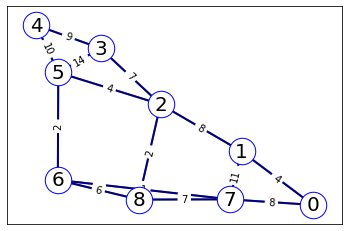

In [37]:
show_graph(Prims_grafo_matrix_heap, 'b')

In [38]:
%time run_Heap(Prims_grafo_matrix_heap)

Source - Destination
 0 -  1
 5 -  2
 2 -  3
 3 -  4
 6 -  5
 7 -  6
 0 -  7
 2 -  8
CPU times: user 1.8 ms, sys: 2.05 ms, total: 3.85 ms
Wall time: 3.86 ms
